# Part one : Setup
- This code snippet sets up a Python environment with certain requirements and configurations, mainly for a machine learning project that includes data visualization and saving figures. Here’s a detailed explanation of each part:

In [1]:
# Python ≥3.5 is required
#  If the condition is not met, an AssertionError will be raised. 
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
# to display plots inline within the notebook.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

'''
Where to save the figures
PROJECT_ROOT_DIR is set to the current directory.
CHAPTER_ID is a string identifier for the project or chapter.
IMAGES_PATH constructs the path to a directory for saving images using os.path.join.
os.makedirs(IMAGES_PATH, exist_ok=True) creates the directory if it doesn't exist, with exist_ok=True ensuring no error is raised if the directory already exists. 
'''
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

'''save_fig is a function to save plots with specific settings:
fig_id: The identifier/name for the figure.
tight_layout: If True, adjusts the layout of the figure to minimize overlaps.
fig_extension: The file format for saving the figure (default is "png").
resolution: The resolution (dots per inch) of the saved figure (default is 300 dpi).
Constructs the full path to save the figure using os.path.join.
Prints a message indicating the figure is being saved.
If tight_layout is True, plt.tight_layout() is called to adjust the layout.
plt.savefig saves the figure to the constructed path with the specified format and resolution.
'''
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Part Two : Get the Data 

## Download the Data
 - This code is used to download a dataset from the web, store it locally, and extract its contents for further use.

In [2]:
import os           # a way of using operating system dependent functionality like reading or writing to the file system.
import tarfile      #is used to read and write tar archive files.
import urllib
import urllib.request       # is used for working with URLs. It provides functions for opening and reading URLs, which can be useful for fetching data from the web, 
                    #such as downloading files or web scraping.

download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" 
#The local directory path where the dataset will be stored. This uses os.path.join to create a path string that works on all operating systems.
# CAPITAL VARIABLE = CONSTANT 
HOUSING_PATH = os.path.join("datasets","housing")
#concatenating DOWNLOAD_ROOT with the relative path to the dataset file.
HOUSING_URL = download_root + "datasets/housing/housing.tgz" 
#housing_url : The URL from which the dataset will be downloaded. 
#housing_bath : The local directory path where the dataset will be stored. 
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH ):
    #checks if the directory specified by housing_path exists. If not, it creates the directory using os.makedirs.
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    #It then downloads the tar file from housing_url and saves it to tgz_path using urllib.request.urlretrieve.
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    #This opens the downloaded tar file using tarfile.open.It extracts all the contents of the tar file to the directory specified by housing_path using extractall.
    #Finally, it closes the tar file.
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [3]:
import pandas as pd
#This function is designed to load a dataset from a CSV file and return it as a DataFrame, which is a core data structure in pandas.
#housing_path: This is the directory path where the housing dataset is stored. 
def load_housing_data(housing_path=HOUSING_PATH):
    #joining the directory path (housing_path) with the filename ("housing.csv"). This ensures that the path is correctly constructed regardless of the operating system.
    csv_path = os.path.join(housing_path,"housing.csv")
    # reads a CSV file into a DataFrame. A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure

In [4]:
housing = load_housing_data()
# returns the first 5 rows of the DataFrame by default. 
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()
# there are no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing['ocean_proximity'].value_counts()
# Return a Series containing counts of unique values

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
housing.describe()
# Series or DataFrame Summary statistics of the Series or Dataframe provided.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure Histogram plots


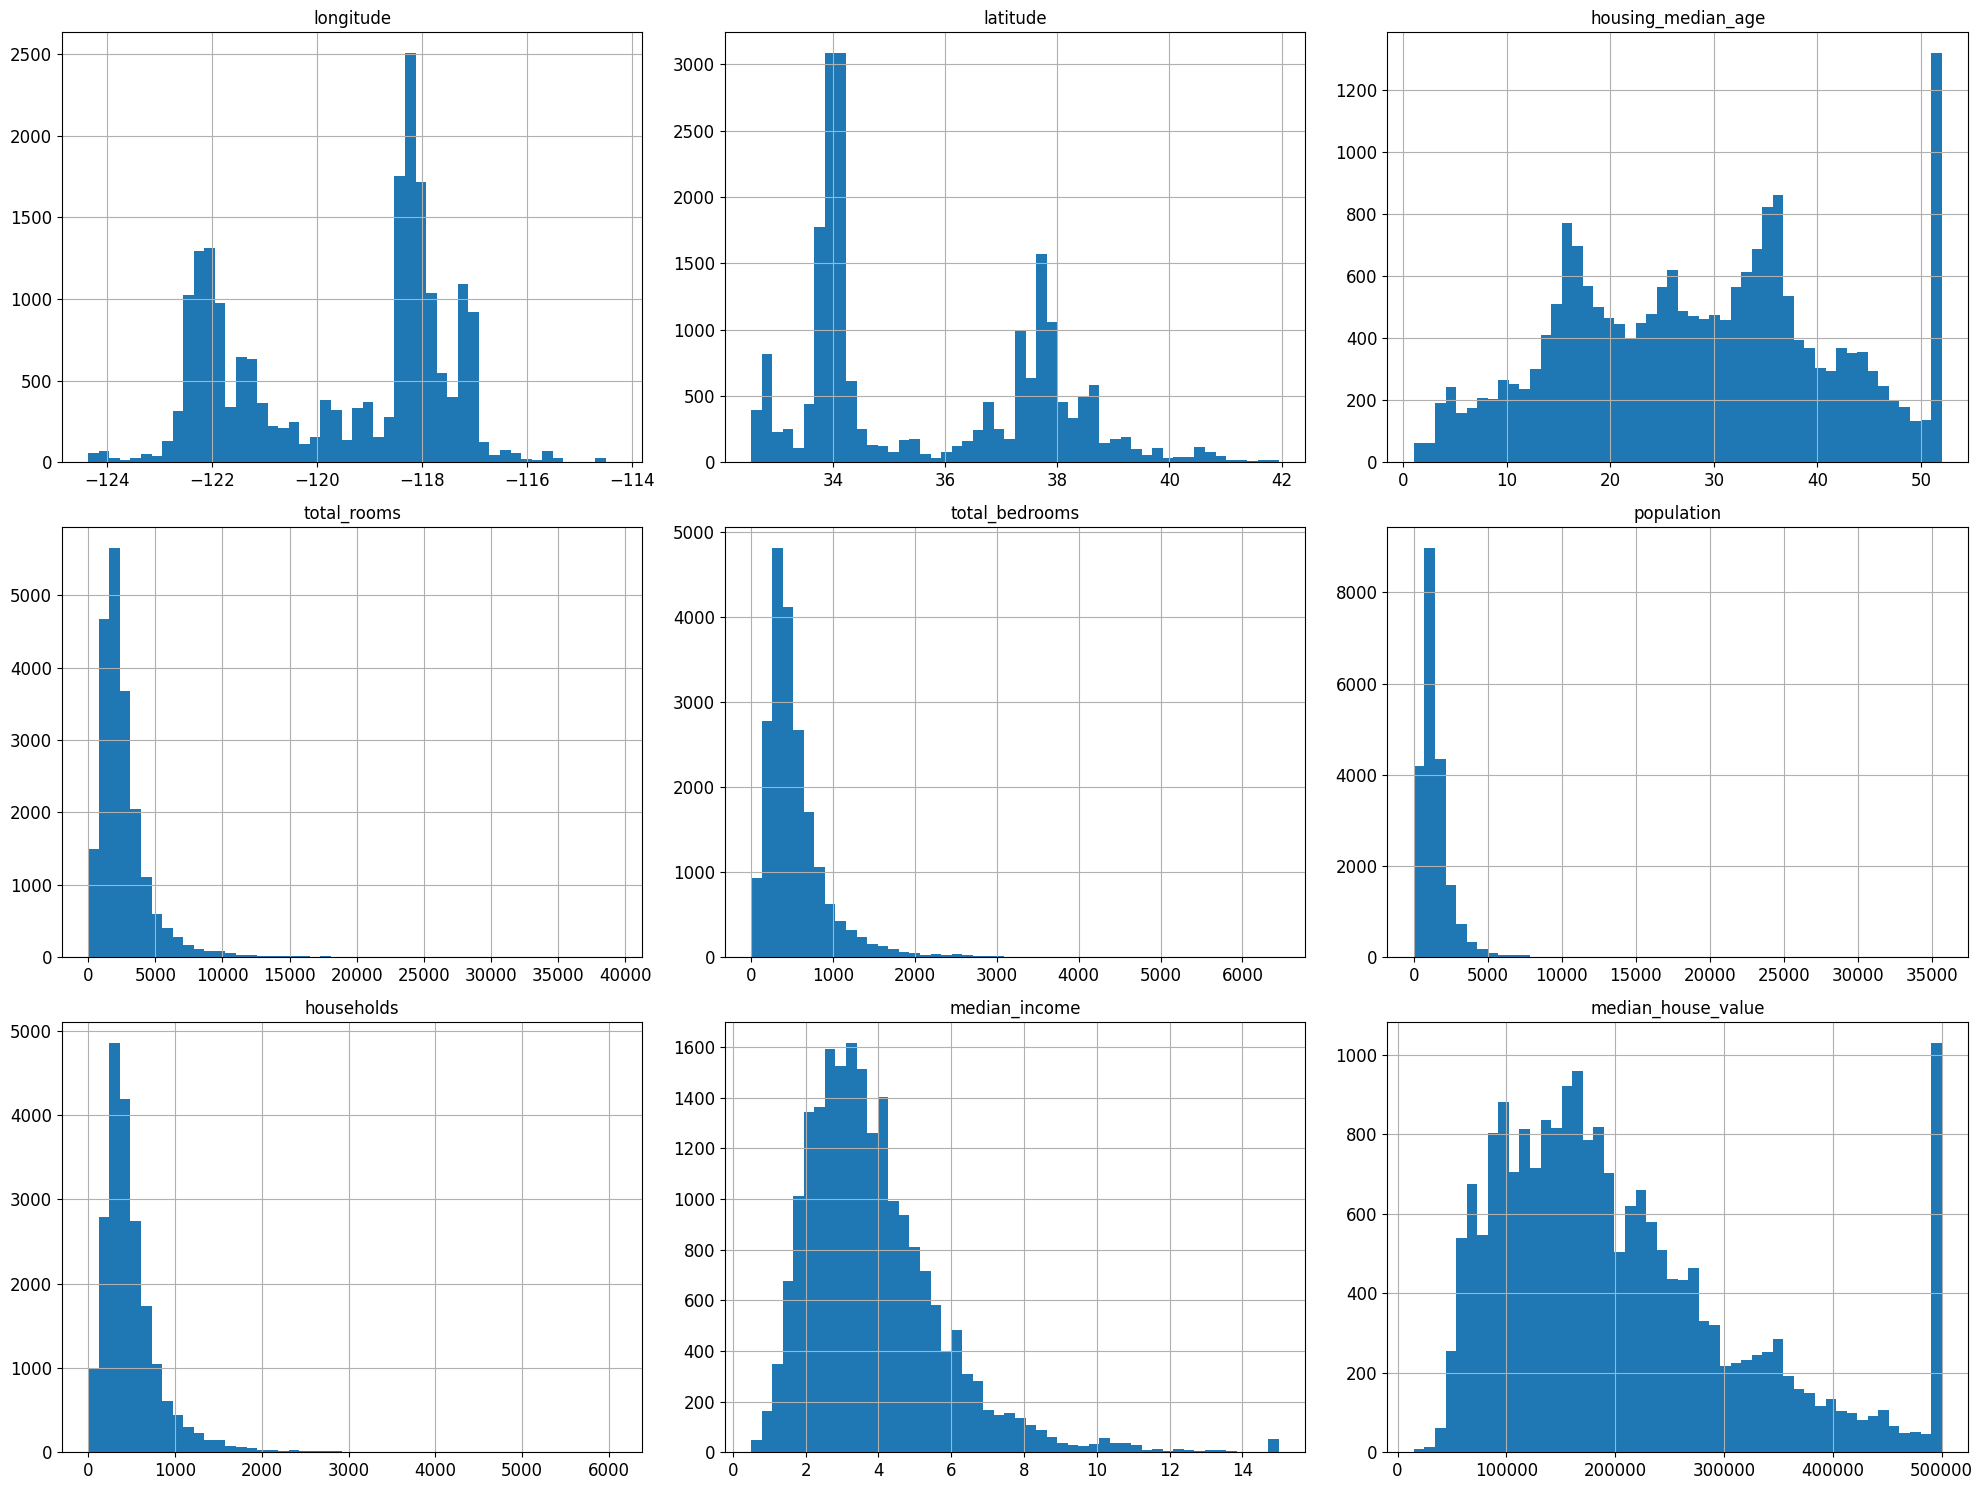

In [ ]:
# plot the Dataframe 
# %matplotlib inline 
# import matplotlib.pyplot as plt 
# This is a pandas DataFrame method that generates histograms for all numerical columns in the DataFrame.
# is given in inches,
# This parameter specifies the number of bins (intervals) to divide the data into for the histograms. 
housing.hist(bins=50,figsize=(20,15))
save_fig("Histogram plots")
plt.show()

madian income : the number 3 refers to 30,000 
____________________________________________________________________
the labels(median house price) the model can not predict something byond 500,000 so if we need predictions byond that we have 2 options: 
1- collect other labels 
2- remove those districts 
______________________________________________________________________
some the histrogram is tail-heavy like total-bedrooms : they extend much farther to the right than to the left. this is hard to detect patterns. 

In [7]:
np.random.seed(42)
#  you ensure that each run of the script generates the same shuffled indices, and consequently, the same training and test sets.

## Create test set 
- Pick some random instances typically 20% of the dataset 

In [ ]:
''' sklearn has train_test_split() function already 
    we will update this code to add identifier ''' 
def split_train_test(data,test_ratio):
    # is an array of these mousharat_makhtalta, This ensures that the data is randomly Etalebet.
    # generates a random permutation of indices based on the length of the dataset.
    mousharat_makhtalta = np.random.permutation(len(data))
    # This gives the number of samples that should be in the test set. 
    test_set_size = int(len(data)*test_ratio)
    # test_examples contains the first test_set_size indices from the shuffled indices.
    # train_examples contains the remaining indices after the test set indices.
    test_examples = mousharat_makhtalta[:test_set_size]
    train_examples = mousharat_makhtalta[test_set_size:]
    # The function returns two DataFrames: each one has either test or train indexes 
    return data.iloc[train_examples], data.iloc[test_examples]

In [ ]:
train_set , test_set = split_train_test(housing,0.2)
len(train_set)

16512

In [ ]:
len(test_set)

4128

 Implementations 
 - to consistently split a dataset into training and test sets based on unique identifiers.  
  - This ensures that the test set will remain consistent across multiple runs. the test set will not contain ant instance that was previously in the training set even if the data dor uptated. 
  the new data will be in the test set with 20% and randomly chosen from the data without any previously training set 

In [ ]:
# computes a CRC-32 (Cyclic Redundancy Check) checksum of a given input. 

from zlib import crc32 
def test_set_check(identifier,test_ratio):
    # Converts the identifier to a 64-bit integer. 
    # Computes the CRC-32 checksum of the identifier 
    # Performs a bitwise AND with 0xffffffff to ensure a 32-bit unsigned integer result.
    # Checks if this result is less than test_ratio * 2**32, which determines if the identifier should be in the test set.
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32 

def split_train_test_by_id(data,test_ratio,id_column):
    # column name id_column containing unique identifiers.
    # Applies the test_set_check function to each identifier to determine if it should be in the test set.
    # Splits the data into training and test sets based on this check.
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
import hashlib 
#  provides various secure hash algorithms, including MD5.

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [ ]:

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

zlib : 
 - pros : fast and provides a uniform distribution. Easy to understand Consistent and deterministic split.
 - cons : is not cryptographically secure
_____________________________________________________________
hashlib 
 - pros : well-known and produces a consistent hash. md5 produces a 128-bit hash, and using the last byte provides sufficient randomness for splitting.
 - cons : Slightly more complex than using crc32. May be slower than crc32 due to the complexity of md5. 
_________________________________________________________________
bytearray 
 - pros : Similar to the second implementation, it uses hashlib.md5. Converts the digest to a bytearray before accessing the last byte.
  - cons : Converting to bytearray is an unnecessary step, adding complexity without clear benefit.

In [ ]:
# housing dataset columns do not have an identifier. so we will use row index as ID 

housing_with_id = housing.reset_index() # add an idex column 
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"index")

In [ ]:
# we will  use this 
# If you use the row index as a unique identifier, you need to make sure that
# new data gets appended to the end of the dataset and that no row ever gets deleted. I
# we can use longitude and latitude to make avoid the possibility of deleting a rowv
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]  # creating new column 
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"id")      # use the new column as identifier 


In [ ]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [ ]:
from zlib import crc32 
import numpy as np 
identifier = np.linspace(0,20639,20640)
print(crc32(np.int64(identifier)))
print(np.int64(identifier)) 

442603254
[    0     1     2 ... 20637 20638 20639]


In [ ]:
from zlib import crc32 
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32 

def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
    print(in_test_set)
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index() # add an idex column 
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"index")
print(test_set)

0        False
1        False
2         True
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: index, Length: 20640, dtype: bool
       index  longitude  latitude  housing_median_age  total_rooms  \
2          2    -122.24     37.85                52.0       1467.0   
5          5    -122.25     37.85                52.0        919.0   
12        12    -122.26     37.85                52.0       2491.0   
16        16    -122.27     37.85                52.0       1966.0   
23        23    -122.27     37.84                52.0       1688.0   
...      ...        ...       ...                 ...          ...   
20615  20615    -121.54     39.08                23.0       1076.0   
20617  20617    -121.53     39.06                20.0        561.0   
20622  20622    -121.44     39.00                20.0        755.0   
20626  20626    -121.43     39.18                36.0       1124.0   
20629  20629    -121.39  

In [ ]:
print(0xffffffff)
print(0.2*2**32)
print(442603254 & 0xffffffff < 0.2*2**32)

4294967295
858993459.2
True


random_state
 parameter that
 allows you to set the random generator seed. Second, you can pass it multiple
 datasets with an identical number of rows, and it will split them on the same
 indices (this is very useful, for example, if you have a separate DataFrame for
 labels):

In [5]:
from sklearn.model_selection import train_test_split
train_set,test_set= train_test_split(housing,test_size=0.2,random_state=42)
test_set_with_id = test_set.reset_index() # add an idex column 
test_set_with_id["index"]

0       20046
1        3024
2       15663
3       20484
4        9814
        ...  
4123    15362
4124    16623
4125    18086
4126     2144
4127     3665
Name: index, Length: 4128, dtype: int64

 For example, the US population is 51.3% females and
 48.7% males, so a well-conducted survey in the US would try to maintain this
 ratio in the sample: 513 female and 487 male. This is called stratified
 sampling: the population is divided into homogeneous subgroups called
 strata
 ______________________________________________________________
Suppose you chatted with experts who told you that the median income is a
 very important attribute to predict median housing prices. You may want to
 ensure that the test set is representative of the various categories of incomes
 in the whole dataset. 
  most median
  ___________________________________________________________
 income values are clustered around 1.5 to 6 (i.e., $15,000–$60,000), but some
 median incomes go far beyond 6. It is important to have a sufficient number
 of instances in your dataset for each stratum,

<Axes: >

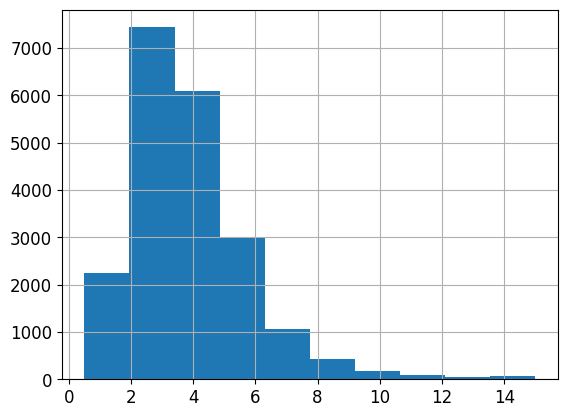

In [5]:
# . The following code uses the pd.cut() function to create an income category attribute with five
# categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less
# than $15,000), category 2 from 1.5 to 3, and so on:
housing["median_income"].hist()

<Axes: >

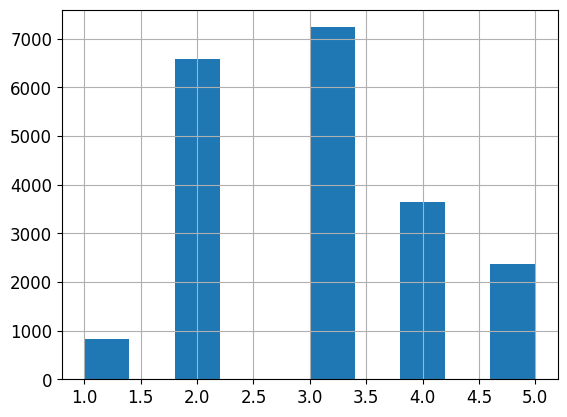

In [8]:
housing["income_cat"] = pd.cut(housing["median_income"] ,bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [11]:
# Return a Series containing counts of unique values.The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.
housing["income_cat"].value_counts()   # output total = 20640

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

In [9]:
# STRATIFIED SAMPLING BASED 
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
'''print(split)
the output : StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)
'''
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    #print(train_index) #output : [12655 15502 ....] = train_set indexes , contain 16512
    #print(test_index)  #output : [5241 17352 ....] = test_set indexes , contain 4128
    #print(strat_train_set)  # output : DataFrame contains 16514 rows * 11 columns

In [13]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [14]:
housing["income_cat"].value_counts()/len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

The table demonstrates that stratified sampling consistently produces values with smaller errors (both positive and negative) compared to purely random sampling, indicating that stratified sampling is generally more accurate and reliable in representing the true population parameter.
______________________________________________________________
Series.sort_index : Sort Series by the index.

DataFrame.sort_values : Sort DataFrame by the value.

Series.sort_values : Sort Series by the value.

In [10]:
def income_cat_nesbah(data):
    # The result is a Series that shows the proportion of each income category within the strat_test_set DataFrame. Each value in the Series represents the percentage of the total dataset that belongs to a particular income category.
    return data["income_cat"].value_counts()/len(data) # len_data = 20640 

# split the data radomly 
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42) 
compare_nesbah = pd.DataFrame({
    "overall" : income_cat_nesbah(housing),
    "stratified" : income_cat_nesbah(strat_test_set) ,
    "Random" : income_cat_nesbah(test_set) ,
}).sort_index() # The original DataFrame sorted by the labels or None if inplace=True.

# we will add two more columns 
compare_nesbah["Rand. %error"] = 100*compare_nesbah["Random"]/compare_nesbah["overall"]-100
compare_nesbah["strat. %error"] = 100 * compare_nesbah["stratified"] / compare_nesbah["overall"] - 100
compare_nesbah

,overall,stratified,Random,Rand. %error,strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [ ]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3


In [11]:
#  Now you should remove the income_cat attribute so the data is back to its original state:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat" , axis=1 , inplace=True)

In [17]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


# Part Three :  Discover and Visualize the Data to Gain Insights 

In [12]:
#  if the training set is very large, you may want to sample an exploration set
# Let’s create a copy so that you can play with it without harming the training set:
housing = strat_train_set.copy()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


## Visualizing Geographical Data

Saving figure bad_visulization_plot


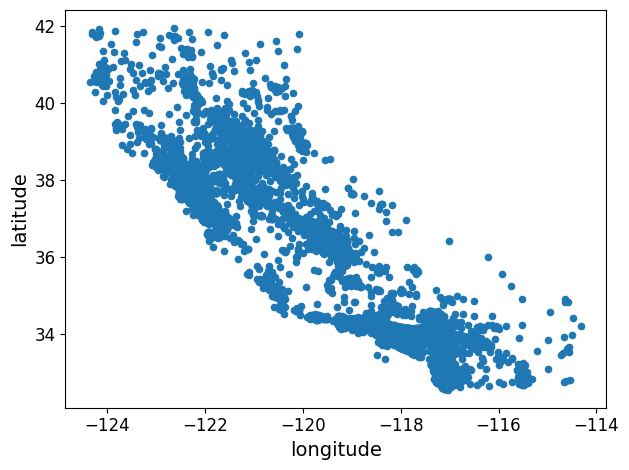

In [12]:
#  geographical information (latitude and longitude) ,  scatterplot of all districts to visualize the data 
housing.plot(kind="scatter" , x="longitude" ,y="latitude")
save_fig("bad_visulization_plot")

Saving figure better_visualization_plot


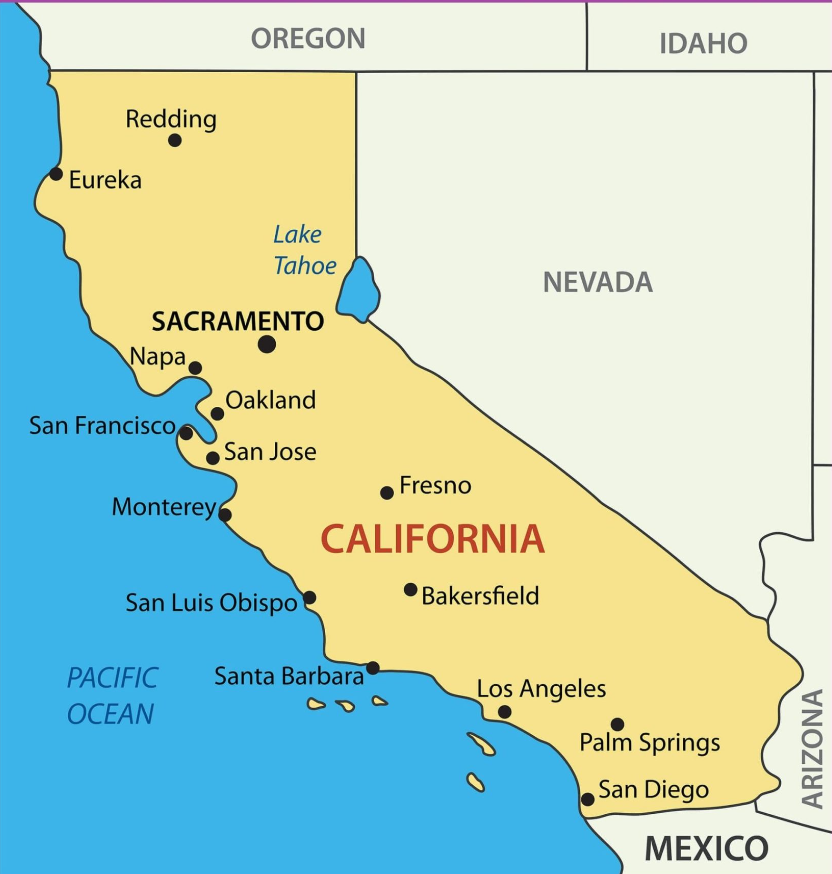

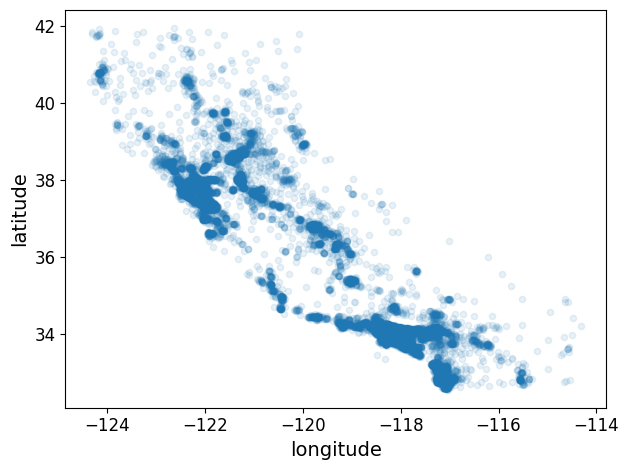

In [ ]:
# it is hard to see any pattern. so setting alpha 0.1 makes it easier to visualize the places 
housing.plot(kind="scatter" , x="longitude" , y="latitude" ,alpha=0.1)
save_fig("better_visualization_plot")

from IPython.display import Image

# Replace backslashes with forward slashes
image_path = 'C:/Users/gana5/Pictures/Screenshots/california.png'

# Display the image
Image(filename=image_path)

# high-density areas are Bay Area, Los Angeles, San Diego

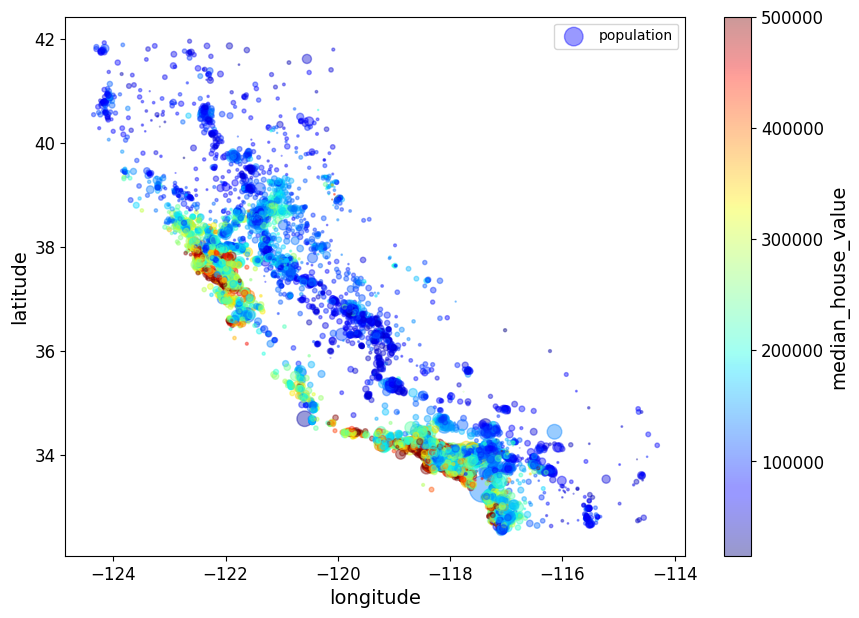

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
# save_fig("housing_prices_scatterplot")
# s:  The size of each point is proportional to the population divided by 100.could be a scalar or a series 
# c: The color of each point represents the median house value.Uses the "jet" colormap for the color mapping.could be a scalar or a series
#  means that the color of each point represents the median house value
# jet ranges from blue (low price) to red (high price) , cmap : predefined color map 
# the image tells that price is related to the location(near the ocean or not) and to the population density


Types of Clustering Algorithms:
K-Means Algorithm:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
Hierarchical Clustering:
Applications of Clustering Algorithms:
Data Analysis: To understand data distribution and discover hidden patterns.
Market Segmentation: To classify customers into groups based on their behavior and needs.
Image Analysis: To segment images into similar parts.
Text Mining: To group similar documents or words together.
Purpose: A clustering algorithm can help identify the main clusters or groups within the housing market data. This means it can find patterns or groupings of similar housing prices and locations.
New Features: By identifying clusters, the algorithm can create new features, such as the distance to the cluster centers. These features can be used in further analysis or predictive models.
Proximity to Ocean: While proximity to the ocean generally affects housing prices, it is not a simple or consistent rule, especially in certain areas like Northern California.

Saving figure california_housing_prices_plot


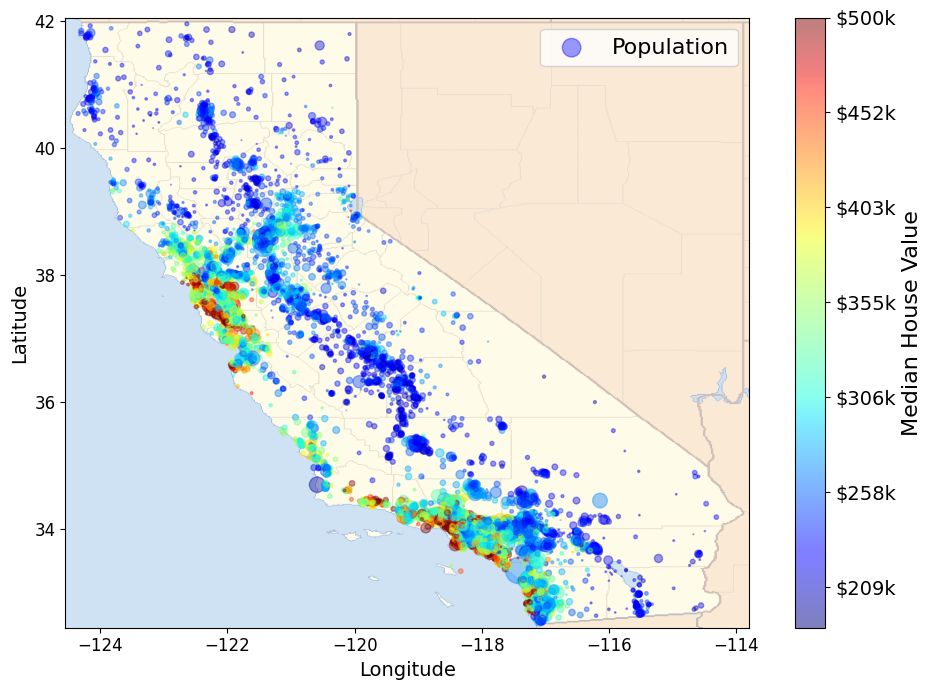

In [ ]:
# Download the California image
# images_path : Creates a file path for storing image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
# Creates the directory if it doesn't already exist
os.makedirs(images_path, exist_ok=True)
# Base URL where the image is located.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# The name of the file to be downloaded.
filename = "california.png"
print("Downloading", filename)
# creates the full URL for downloading the image. 
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
# Downloads the image from the constructed URL and saves it to the images_path.
urllib.request.urlretrieve(url, os.path.join(images_path, filename))
# ____________________________________________________________________

import matplotlib.image as mpimg
# mpimg.imread:  Loads the image from the specified path into an array.
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
# imshow:  Displays the image on top of the scatter plot
# extent: Defines the bounds of the image (longitude and latitude range).
# alpha: yadabat shafafiye al-sawarah.
# cmap:  this is often redundant here since the image is already in its own format.
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# add colorbar & wasselleh al-aydah
prices = housing["median_house_value"]
# Creates 11 tick values ranging from the minimum to the maximum median house value.
tick_values = np.linspace(prices.min(), prices.max(), 11)
# Adds a colorbar with tick values normalized by the maximum house value.
cbar = plt.colorbar(ticks=tick_values/prices.max())
# Formats the colorbar ticks to display in thousands of dollar
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
#  Labels the colorbar.
cbar.set_label('Median House Value', fontsize=16)

# Adds a legend to the plot 
plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## Looking for Correlations 

In [14]:
print(housing.dtypes) # ocean_proximity is a problem deny us to find correlation 

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [22]:
features1 = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms",
             "population","households","median_income","median_house_value"]
corr_matrix = housing[features1].corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
#To remove multiple columns using housing.drop(columns=["first column","second column"])
#housing_subset = housing.drop(columns=['ocean_proximity'])
#corr_matrix = housing_subset.corr()
#corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; When the coefficient is close to –1, it means that there is a strong negative correlation
you can see asmall negative correlation between the latitude and the median house value(i.e., prices have a slight tendency to go down when you go north). 
 coefficients close to 0 mean that there is no linear correlation.
 - The correlation coefficient only measures linear correlations (“if x goes up, then y
 generally goes up/down”). It may completely miss out on nonlinear relationships (e.g.,
 “if x is close to 0, then y generally goes up”). Note how all the plots of the bottom row
 have a correlation coefficient equal to 0, despite the fact that their axes are clearly not
 independent: these are examples of nonlinear relationships. Also, the second row shows
 examples where the correlation coefficient is equal to 1 or –1; notice that this has nothing
 to do with the slope. For example, your height in inches has a correlation coefficient of 1
 with your height in feet or in nanometers

Saving figure scatter_matrix_plot


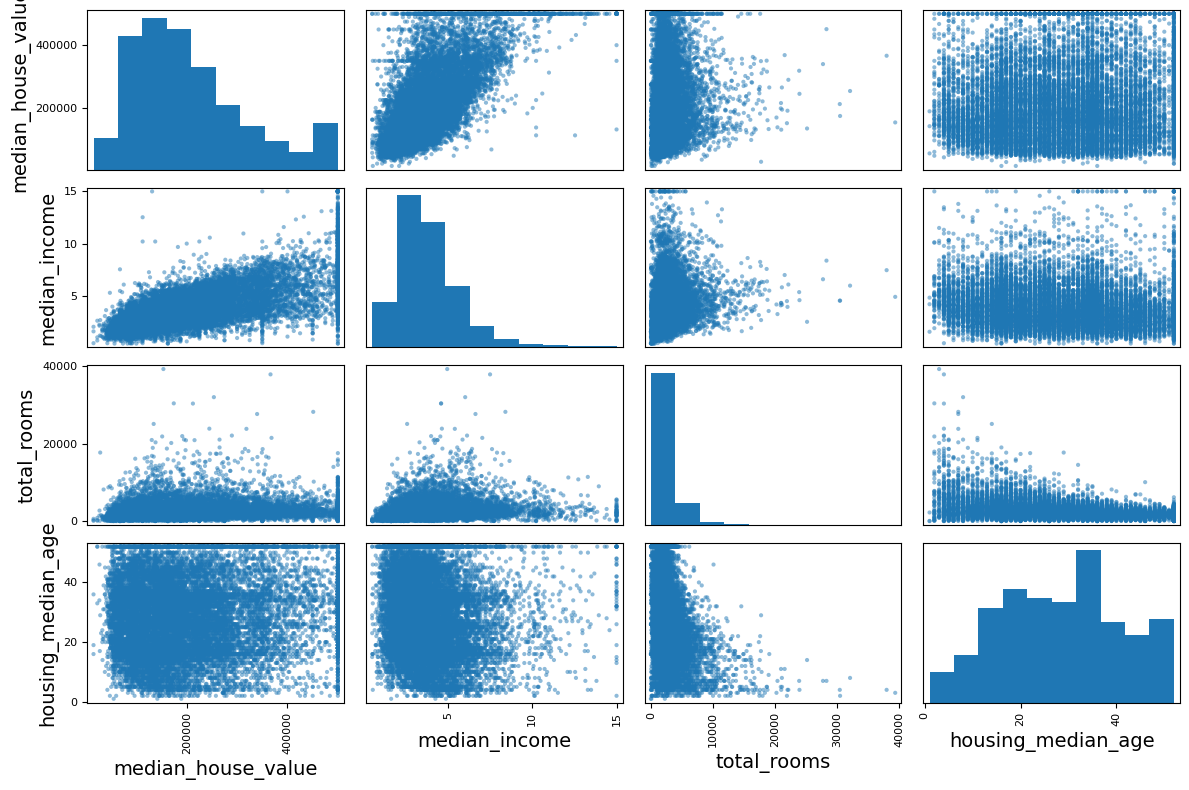

In [18]:
# To plot the correlation 
from pandas.plotting import scatter_matrix
features = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[features],figsize=(12,8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


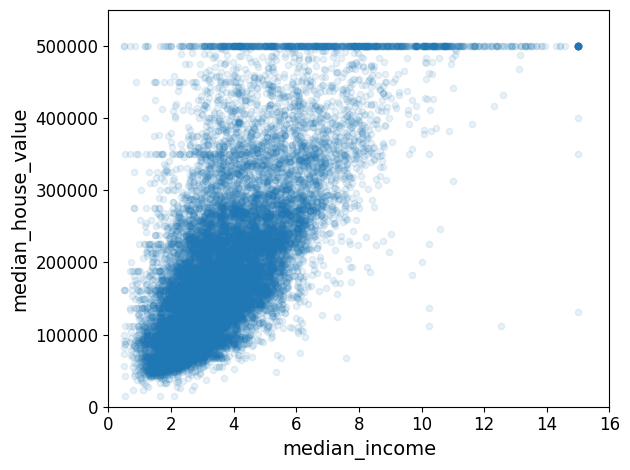

In [26]:
# the income feature is so important so lets zoom in 
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0,16,0,550000]) # x axis from 0 to 16, y axis from 0 to 550000
save_fig("income_vs_house_value_scatterplot")

- strong correlation indeed. upward trend and not mustatha.
- visible horizontal line at 500,000 and 450,000 and 280,000 and below that 
- Removing districts or data points that introduce quirks helps ensure that your model learns from representative and clean data. This improves the likelihood that your model will generalize well to new data and avoid learning patterns that are specific only to problematic data.

"\nplt.figure(figsize=(10, 6))\nplt.scatter(filtered_data['median_income'], filtered_data['median_house_value'], alpha=0.2)\nplt.xlabel('median_income')\nplt.ylabel('median_house_value')\nplt.show()"

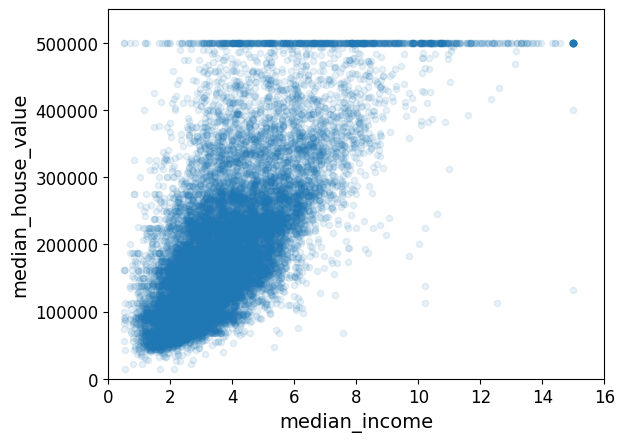

In [19]:
# to remove hirozental lines 
price_caps = [550000,500000, 450000, 350000, 280000]
filtered_data = housing[~housing['median_house_value'].isin(price_caps)]
filtered_data.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0,16,0,550000]) # x axis from 0 to 16, y axis from 0 to 550000


## Experimenting with Attribute Combinations

In [25]:
# Feature Engineering 
# to combine features together and create new features 
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] 
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_houshold"] = housing["population"]/housing["households"]
features2 = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms",
             "population","households","median_income","median_house_value",
             "rooms_per_household","bedrooms_per_room","population_per_houshold"]
corr_matrix = housing[features2].corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.687151
rooms_per_household        0.146255
total_rooms                0.135140
housing_median_age         0.114146
households                 0.064590
total_bedrooms             0.047781
population_per_houshold   -0.021991
population                -0.026882
longitude                 -0.047466
latitude                  -0.142673
bedrooms_per_room         -0.259952
Name: median_house_value, dtype: float64

The correlations between `median_house_value` and the other features provide insight into how these features relate to house prices.

1. **median_income (0.687151)**:
   - **Positive and strong correlation**: Higher median incomes are strongly associated with higher house prices. This makes sense as wealthier areas can generally support higher housing costs.

2. **rooms_per_household (0.146255)**:
   - **Positive and weak correlation**: More rooms per household slightly increase house prices, possibly reflecting larger, more valuable homes.

3. **total_rooms (0.135140)**:
   - **Positive and weak correlation**: Areas with more total rooms tend to have slightly higher house prices, possibly indicating larger houses or more housing options.

4. **housing_median_age (0.114146)**:
   - **Positive and weak correlation**: Older neighborhoods slightly correlate with higher house prices, which could indicate established, desirable areas.

5. **households (0.064590)**:
   - **Positive and very weak correlation**: The number of households has a very weak positive correlation with house prices, suggesting little direct impact.

6. **total_bedrooms (0.047781)**:
   - **Positive and very weak correlation**: The total number of bedrooms in an area has a very weak positive correlation with house prices.

7. **population_per_household (-0.021991)**:
   - **Negative and very weak correlation**: A slightly higher population per household is weakly associated with lower house prices, possibly indicating overcrowding.

8. **population (-0.026882)**:
   - **Negative and very weak correlation**: Larger populations are very weakly associated with lower house prices, which might suggest high-density, lower-cost housing.

9. **longitude (-0.047466)**:
   - **Negative and very weak correlation**: The slight negative correlation might reflect geographical variations in house prices, depending on the specific region's longitude.

10. **latitude (-0.142673)**:
    - **Negative and weak correlation**: Higher latitudes (further north) are somewhat associated with lower house prices, possibly reflecting regional economic differences.

11. **bedrooms_per_room (-0.259952)**:
    - **Negative and moderate correlation**: A higher ratio of bedrooms to rooms is moderately associated with lower house prices. This could indicate smaller or less desirable homes, where rooms are more likely to be subdivided into bedrooms. bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms.houses with a lower bedroom/room ratio tend to be more expensive. 

These correlations help identify which features are more influential in determining house prices. Median income is the most significant factor, while geographical coordinates and the composition of rooms and bedrooms also play a role, albeit to a lesser extent.

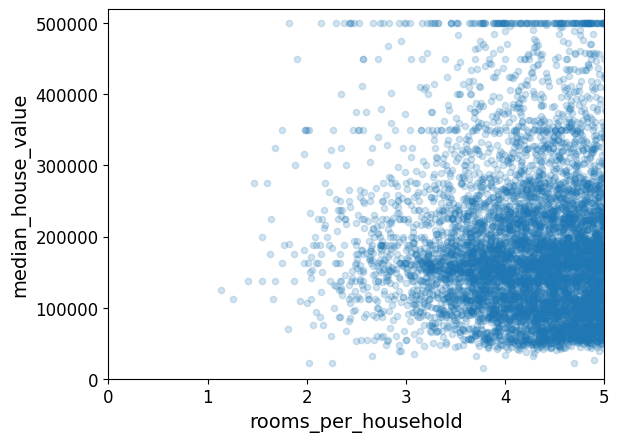

In [26]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [27]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_houshold
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Part Four : Prepare the Data for Machine Learning Algorithms 

  - This will allow you to reproduce these transformations easily on any
 dataset (e.g., the next time you get a fresh dataset).
  - You will gradually build a library of transformation functions that
  - you can reuse in future projects.
  - You can use these functions in your live system to transform the new data before feeding it to your algorithms.
  - This will make it possible for you to easily try various transformations and see which combination of transformations works best.

In [13]:
# clean training set we make a copy 
# drop() : creates a copy of the data 
# making two dataframe one for the features only and one for the targets only
housing = strat_train_set.drop("median_house_value" , axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
 

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [23]:
housing_labels.describe()

count     16512.000000
mean     207005.322372
std      115701.297250
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

## Data Cleaning

we need to remove missing features 
we have three options:
```python
1) remove the missing values from the feature 
     -  housing.dropna(subset=["total_bedrooms"])    
2) remove the whole feature 
     - housing.drop("total_bedrooms", axis=1)  
3) set the missing values to some values like 0 or the mean or the median 
     -  median = housing["total_bedrooms"].median() 
        housing["total_bedrooms"].fillna(median, inplace=True)
```

In [15]:
# To visualize each option 
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [ ]:
# option 1 : to remove the sample_incomplete_rows 
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) 

In [ ]:
# option 2  : remove only the bed_rooms column 
sample_incomplete_rows.drop("total_bedrooms" ,axis=1) 

In [32]:
# option 3 : all bedrooms missing values = 433.0 
median = housing["total_bedrooms"].median() 
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

np.float64(433.0)

In [16]:
# use the library 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") 
# we have to remove all the object features because it only work on numerical features 
housing_num = housing.drop("ocean_proximity" ,axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

# to train the imputer 
imputer.fit(housing_num) 

SimpleImputer(strategy='median')

In [17]:
imputer.statistics_
# the median of each feature column 

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [18]:
# to check the imputer function 
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Transform the training set :

In [19]:
# use trained imputer to transform missing data 
x = imputer.transform(housing_num)  
# the result is array containing the whole data 
# we have to return the values to DataFrame 
housing_tr = pd.DataFrame(x , columns=housing_num.columns ,index=housing.index)
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [41]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


##  Handling Text and Categorical Attributes

In [20]:
# preprocess the ocean proximity 
housing_cat = housing[["ocean_proximity"]]   # type is DataFrame 
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


convert categories to numbers 

In [21]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoder = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoder[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [22]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Category 0 is near 4 more than o to 1 
to fix that we use one hot encoder which set only attribute to 1 hot and the other 0  

In [23]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)
housing_cat_1hot
# output : SciPy sparse matrix, instead of a NumPy array

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

 This is very useful when you have categorical attributes with thousands of
 categories. After one-hot encoding, we get a matrix with thousands of
 columns, and the matrix is full of 0s except for a single 1 per row. Using up
 tons of memory mostly to store zeros would be very wasteful, so instead a
 sparse matrix only stores the location of the nonzero elements. 

In [24]:
print(housing_cat_1hot.toarray())
# output 5 arrays for each attribute(1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN)
# 16512 * 5 
print(one_hot_encoder.categories_)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [32]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [25]:
# Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
# THE OUTPUT IS ARRAY 

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

one-hot encoding will result in a large number of input
 features. This may slow down training and degrade performance. If this happens, you
 may want to replace the categorical input with useful numerical features related to the
 categories: for example, you could replace the 
ocean_proximity
 feature with the
 distance to the ocean 
  This is an example of representation learning
  you could replace each category with a
 learnable, low-dimensional vector called an embedding

## Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to
 write your own for tasks such as custom cleanup operations or combining
 specific attributes. You will want your transformer to work seamlessly with
 Scikit-Learn functionalities (such as pipelines)

In [26]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [27]:
from sklearn.base import BaseEstimator,TransformerMixin
# column index 
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 
class add_features_together(BaseEstimator,TransformerMixin):
    # add the option of adding extra feature 
    def __init__(self,add_bedrooms_per_room_feature=True): # no *args or *kargs
        self.add_bedrooms_per_room_feature = add_bedrooms_per_room_feature
    def fit(self,x,y=None):
        return self # nothing else to do 
    def transform(self,x):
        # adding extra features 
        # [:,3] = all rows in column number 3 = rows*1 
        rooms_per_household = x[:,rooms_ix] / x[:,households_ix] 
        population_per_household = x[:,population_ix] /x[:,households_ix]
        if self.add_bedrooms_per_room_feature:
            add_bedrooms_per_room_feature = x[:,bedrooms_ix]/x[:,rooms_ix]
            # return an array 16512*11
            # np.c_ = combine two arrays together in one array 
            return np.c_[x,rooms_per_household,population_per_household,add_bedrooms_per_room_feature]
        else:
            return np.c_[x, rooms_per_household, population_per_household]
att_adder = add_features_together(add_bedrooms_per_room_feature=False)
housing_extra_features = att_adder.transform(housing.values)

In [28]:
housing_extra_features.shape
# it is an array, we've lost the column names 

(16512, 11)

In [29]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [housing.columns.get_loc(c) for c in col_names]

Return array to DataFrame 

In [31]:
housing_extra_features = pd.DataFrame(
    housing_extra_features , 
    # old ones + new ones 9+2 =11  
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index   # same old rows 16512 
)
housing_extra_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## Feature Scaling

Machine Learning algorithms don’t
 perform well when the input numerical attributes have very different scales.
 This is the case for the housing data: the total number of rooms ranges from
 about 6 to 39,320, while the median incomes only range from 0 to 15. Note
 that scaling the target values is generally not required
- There are two common ways to get all attributes to have the same scale: min
max scaling and standardization.
- Min-max scaling (many people call this normalization) is the simplest: values
 are shifted and rescaled so that they end up ranging from 0 to 1. We do this by
 subtracting the min value and dividing by the max minus the min. Scikit
Learn provides a transformer called 
`MinMaxScaler`
 for this. It has a
 feature_range
 hyperparameter that lets you change the range if, for some
 reason, you don’t want 0–1
 -  Standardization is different: first it subtracts the mean value (so standardized
 values always have a zero mean), and then it divides by the standard deviation
 so that the resulting distribution has unit variance. Unlike min-max scaling,
 standardization does not bound values to a specific range, which may be a
 problem for some algorithms (e.g., neural networks often expect an input
 value ranging from 0 to 1). However, standardization is much less affected by
 outliers. For example, suppose a district had a median income equal to 100
 (by mistake). Min-max scaling would then crush all the other values from 0
15 down to 0–0.15, whereas `standardization` would not be much affected.
 Scikit-Learn provides a transformer called 
StandardScaler
 for
 standardization

In [32]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the data
housing_scaling_using_minmax = pd.DataFrame(min_max_scaler.fit_transform(housing_num), columns=housing_num.columns)

print("Min-Max Scaled DataFrame:")
housing_scaling_using_minmax.head()

Min-Max Scaled DataFrame:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617


In [33]:
# optioin 2 
# Initialize the scalers
housing_copy = housing_num.copy()
standard_scaler = StandardScaler()
# Fit and transform the specific columns
scaled_columns_standard = standard_scaler.fit_transform(housing_copy[['total_rooms', 'total_bedrooms']])

# Create a DataFrame for the scaled columns
housing_scaling_using_standardscale = pd.DataFrame(scaled_columns_standard, columns=['total_rooms', 'total_bedrooms'])

# Replace the old columns with the scaled columns
housing_copy.update(housing_scaling_using_standardscale)
housing_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,0.453368,0.407329,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,-0.721836,-0.794650,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,-0.827057,-0.908547,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,-0.613341,-0.387528,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.000000,646.000000,1837.0,580.0,4.4964


## Transformation Piplines 

- Pipeline class to help with such sequences of transformations. 

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipline = Pipeline([
    # convert Nan or missing values to median value 
    ('imputer' ,SimpleImputer(strategy="median")),
    # add or combine features like bedroooms/room 
    ('feature_adder' ,add_features_together()),
    # scaling the values to be near 
    ('standard_scaler' ,StandardScaler()),
])
# housing contain only numbers and non-NaN and scaled too 
housing_num_tr = num_pipline.fit_transform(housing_num) 

In [51]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

The `ColumnTransformer` class from `sklearn.compose` applies different preprocessing steps to different subsets of columns in a dataset. It allows you to simultaneously transform numerical and categorical features, preserving column names and simplifying complex preprocessing workflows.
- works with DataFrame 
- piplines: takes list of estimator defining a sequence of steps. the last one must be transformer that takes fit_transform() like standardscaler 
-  it conyains list of tuples where each tuple contains a name, a transformer , and list of the names or indice of columns that the transformation 
- return the same number of rows 
- onehot: return a sparse matrix (good,only space for 1s) but num_pipleline return a dense matrix the total result would be dense but sometimes sparse as long a sparse_threshold=0.3 
_____________________________________________________________
 Instead of using a transformer, you can specify the string "drop"if you want the columns to be dropped, or you can specify "passthrough" if you want the columns to be left untouched. By default, the remaining columns (i.e., the ones that were not listed) will be dropped, but you can set the 
remainder hyperparameter to any transformer (or to "passthrough") if you want these columns to be handled differently.

In [35]:
#  making it particularly useful when you have a mix of numerical and
#  categorical features or when you want to apply distinct transformations to
#  different features.
from sklearn.compose import ColumnTransformer
# convert to list 
housing_num_list = list(housing_num)
feature_type_object = ["ocean_proximity"]
full_pipline = ColumnTransformer([
    # did the following 
    ("num" ,num_pipline ,housing_num_list),
    # convert ocean proximity to numbers 
    ("catego" ,OneHotEncoder(),feature_type_object),
])
# housing has no missing values,only numbers, narrow values, extra features
housing_prepared = full_pipline.fit_transform(housing)

In [78]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [57]:
housing_prepared.shape

(16512, 16)

# Part Five : Selecet and Train a model  

## Training and Evaluating on the Training Set

In [36]:
# train linear regression model 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels) 

LinearRegression()

**Test the model on some data from the training set**

In [37]:
# lets try the full preprocessing pipeline on a few training 
some_data = housing.iloc[:5] # first 5 indexes in the training set 
some_labels = housing_labels.iloc[:5] # first 5 indexes in the test set 
print(some_data)
print('_________________________________')
print(some_labels) 
print('_________________________________')
some_data_prepared = full_pipline.transform(some_data) 
print(some_data_prepared)
print('______________________________')
# test some data from the training set after prepareing them 
print('Predictions:' , lin_reg.predict(some_data_prepared)) 

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income ocean_proximity  
12655      2237.0       706.0         2.1736          INLAND  
15502      2015.0       768.0         6.3373      NEAR OCEAN  
2908        667.0       300.0         2.8750          INLAND  
14053       898.0       483.0         2.2264      NEAR OCEAN  
20496      1837.0       580.0         4.4964       <1H OCEAN  
_________________________________
12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_valu

**compare against the actual values**
 - calculate the error using mean sqaured error 
 - the absolute error 
- the error is around $68,627 which is large : model underfitting
- it could mean that the 
    - features do not provide enough info to make good predictions 
    - or the model is not powerful enough 
- to solve the problem we have to choose a more powerful model or reduce the constrains. 
- In short, this means the model is not regularized, so it does not include constraints or penalties to prevent overfitting. Regularization methods add constraints to a model to improve its generalization by penalizing large weights or complex models. 
- the log of the population Applying the logarithm to a set of numbers compresses large values and stretches small values, making the data more manageable and often revealing patterns that are not obvious in the raw data. 
- or try more complex model 

In [38]:
from sklearn.metrics import mean_squared_error 
housing_predictions = lin_reg.predict(housing_prepared) 
linear_mean_squared_error = mean_squared_error(housing_labels,housing_predictions ,squared=False)
linear_mean_squared_error 

C:\Users\gana5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(68627.87390018745)

In [39]:
from sklearn.metrics import mean_absolute_error 
linear_mean_absolute_error = mean_absolute_error(housing_labels,housing_predictions)
linear_mean_absolute_error

np.float64(49438.66860915801)

**training decision tree regression** 
This is a powerful model, capable of finding complex nonlinear relationships in the data 

In [40]:
from sklearn.tree import DecisionTreeRegressor 

tree_regression = DecisionTreeRegressor(random_state=42) 
tree_regression.fit(housing_prepared,housing_labels) 

DecisionTreeRegressor(random_state=42)

**The model can be changed to be perfect with 0 error**

In [41]:
housing_predictions2 = tree_regression.predict(housing_prepared)
tree_regression = mean_squared_error(housing_labels,housing_predictions2,squared=False) 
tree_regression

C:\Users\gana5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(0.0)

## Better Evaluation Using Cross-Validation
-  One way to evaluate the Decision Tree model would be to use the
 train_test_split()
 function to split the training set into a smaller training
 set and a validation set,
-  A great alternative is to use Scikit-Learn’s K-fold cross-validation feature.
 The following code randomly splits the training set into 10 distinct subsets
 called folds, then it trains and evaluates the Decision Tree model 10 times,
 picking a different fold for evaluation every time and training on the other 9
 folds. The result is an array containing the 10 evaluation scores
 ___________________________________________________________________
 - The `cross_val_score` function evaluates a model's performance using cross-validation, providing scores (e.g., accuracy) for each fold. It splits the dataset into multiple folds, trains the model on some folds, and tests it on the remaining folds to assess its generalization ability.
 ____________________________________________________________________
 -  cross-validation features expect a utility function (greater is better) ,cost fuction(lower ids better) 
 -  scoring function is actually the opposite of the MSE 

In [42]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(tree_regression, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_regression_scores = np.sqrt(-scores) 

InvalidParameterError: The 'estimator' parameter of cross_val_score must be an object implementing 'fit'. Got np.float64(0.0) instead.

In [48]:
def display_scores(scores):
    print("scores:",scores)
    print("mean",scores.mean())
    print("standard deviation:" ,scores.std())
#display_scores(tree_regression_scores)

Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems
 to perform worse than the Linear Regression model! Notice that cross
validation allows you to get not only an estimate of the performance of your
 model, but also a measure of how precise this estimate is (i.e., its standard
 deviation). The Decision Tree has a score of approximately 71,407, generally
 ±2,439. You would not have this information if you just used one validation
 set. But cross-validation comes at the cost of training the model several times,
 so it is not always possible

In [86]:
# trying linear regression model instead of the tree decision 
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-lin_scores) 
display_scores(linear_rmse_scores) 

scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
mean 69104.07998247063
standard deviation: 2880.3282098180666


- That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.
- last one RandomForestRegressor 
- Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions.
- building model on top of many other called Ensemble Learning  

In [43]:
from sklearn.ensemble import RandomForestRegressor 
forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(housing_prepared,housing_labels) 

RandomForestRegressor(random_state=42)

In [44]:
housing_predictions3 = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predictions3)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18650.698705770003)

In [49]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
mean 50435.58092066179
standard deviation: 2203.3381412764606


In [91]:
# save a copy from the model in file within the same folder 
import joblib 
joblib.dump(forest_reg,'forest_reg.pkl') 
my_model_loaded = joblib.load("forest_reg.pkl") 

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

# Part Six : Fine-Tune Your Model 

# Part Seven : Grid Search 

In [50]:
from sklearn.model_selection import GridSearchCV 
param_grid = [
    # try 12 3*4 combinnations of hyperparameters 
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    # try 6 2*3 combinations 
    {'bootstrap':[False], 'n_estimators':[3,10],'max_features':[2,3,4]}, 
]
forest_reg = RandomForestRegressor(random_state=42)
# train across 5 fields total (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [51]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

look at the score of each hyperparameters 

In [52]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [53]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.108041,0.004207,0.005752,0.003327,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.369227,0.018990,0.015255,0.001794,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,1.212749,0.068330,0.041638,0.007210,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.190007,0.012669,0.005278,0.005715,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.623226,0.020577,0.009048,0.002368,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,1.921452,0.110864,0.033828,0.002135,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.249394,0.004790,0.003122,0.004525,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.823216,0.012740,0.015564,0.001758,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,2.630497,0.100780,0.038712,0.006271,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.351787,0.019547,0.005946,0.007298,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


we tried 
 - linear regression : score=69,052 
 - decision tree regression : score = 71,407 
 - random forest regression : score = 50,182
 - grid search cv : score = 49,682 
 - random mized search cv : score= 49,150 
so the best model is the last one 


# Part Eight : Randomized Seatch 

use `RandomizedSearchCV`If you let the randomized search run for, say, 1,000 iterations, this
 approach will explore 1,000 different values for each hyperparameter
 (instead of just a few values per hyperparameter with the grid search
 approach).

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
param_distribs = {
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=8),
}
#forest_reg = RandomForestRegressor(random_state=42) 
rnd_seach = RandomizedSearchCV(forest_reg,param_distributions=param_distribs,
                               n_iter=10,cv=5,scoring='neg_mean_squared_error',
                               random_state=42)
rnd_seach.fit(housing_prepared,housing_labels)

C:\Users\gana5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002103A556E10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021035AB8C50>},
                   random_state=42, scoring='neg_mean_squared_error')

In [56]:
cvres= rnd_seach.cv_results_ 
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params) 

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


# Part Nine : Analyze the Best Models and Their Errors

In [57]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [63]:
attributes = num_pipline 
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.06965425227942929), SimpleImputer(strategy='median')),
 (np.float64(0.0604213840080722), add_features_together()),
 (np.float64(0.04218822024391753), StandardScaler())]

# Part Ten : Evaluate Your System on the Tset Set

In [65]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [66]:
final_rmse

np.float64(47873.26095812988)

we can compute a 95% confidence interval for the RMSE:

In [67]:
from scipy import stats 
confidence = 0.95 
squared_errors =(final_predictions-y_test)**2 
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

we could compute the interval manually 

In [68]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(np.float64(45893.360828285535), np.float64(49774.46796717361))

# Part Eleven : Extra material 

# Part Twelve : Exercise Solutions